In [2]:
import numpy as np
from scipy import signal
from scipy import linalg
from scipy.signal import butter, lfilter, freqz
from scipy.io import wavfile
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
r, d = wavfile.read("TQ8-RKE-4F16 Hyundai Sonata 2017.wav")
dr = d[:,0]
di = d[:,1]
dc = dr + 1j*di

dc = dc + np.random.randn(len(dc), 2).view(np.complex128)[0]

def ret_sig_from_sec(sig, rate, start, stop):
    return sig[int(start*rate):int(stop*rate)]
# print(np.shape(np.random.randn(len(dc), 2).view(np.complex128))[0])
# print(np.shape(dc)[0])

In [4]:
def butter_lowpass(cutoff, fs, order):
    normal_cutoff = cutoff / (0.5 * fs)
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

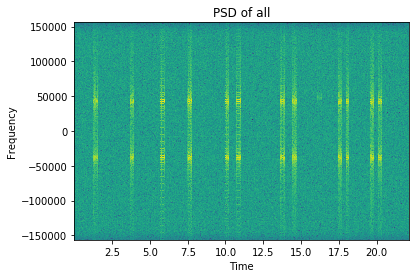

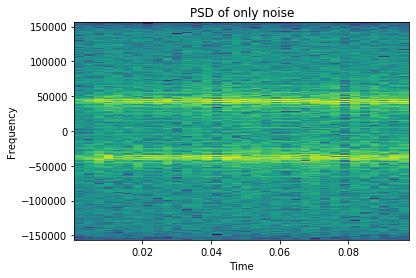

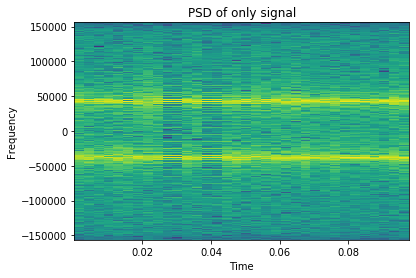

Var Noise: 3302.6165614673923
Var Signal: 4029.8468691927033
SNR: 0.2201982259188435
SNR(dB): -6.571861843504635


In [5]:
# dc = butter_lowpass_filter(dc, int(5e4), r, 10)

plt.specgram(dc, NFFT=1024, Fs=r)
plt.title("PSD of all")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

dcn = ret_sig_from_sec(dc, r, 1.3, 1.4)
dcs = ret_sig_from_sec(dc, r, 1.4, 1.5)

plt.specgram(dcn, NFFT=1024, Fs=r)
plt.title("PSD of only noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.specgram(dcs, NFFT=1024, Fs=r)
plt.title("PSD of only signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

varn = np.var(dcn)
vars = np.var(dcs)
print(f"Var Noise: {varn}")
print(f"Var Signal: {vars}")

snr = (np.var(dcs)-np.var(dcn))/np.var(dcn)
print(f"SNR: {snr}")
snr_db = 10*np.log10(snr)
print(f"SNR(dB): {snr_db}")

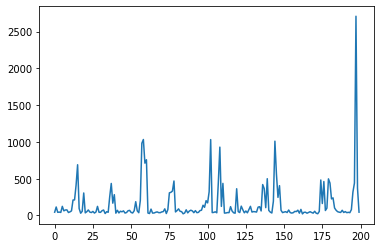

In [6]:
def show_mat(a):
    plt.imshow(a)
    plt.colorbar()
    plt.show()

def processing_vec(y, t, l):
    return y[t:(t+l)]

def mult(y, t, l):
#     return np.dot(processing_vec(y, t, l), processing_vec(y, t, l).T)
    return np.outer(processing_vec(y, t, l), processing_vec(y, t, l)) 

def cal(y, l):
    y = y.reshape((-1, 1))
    r = np.zeros((l, l), dtype=complex)
    for i in range(0, len(y)-l):
        r += mult(y, i, l)
    return r / (len(y)-l)

def test1(x):
    x = np.abs(x)
    t1 = x.sum()
    t2 = x.trace()
    return t1/t2

def test(s, l):
    c = np.abs(cal(s, l))
    return test1(c)

res = np.zeros(200)
for i in np.arange(0, len(res)):
    res[i] = test(ret_sig_from_sec(dc, r, i/10, (i+1)/10), 50)

plt.plot(res)
plt.show()

# print(test(dcn))
# print(test(dcs))

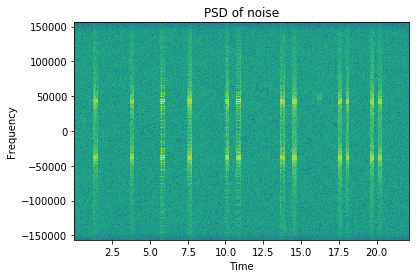

In [49]:
plt.specgram(dc, NFFT=1024, Fs=r)
plt.title("PSD of noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()